\begin{center}
Gabe Morris
\end{center}

In [1]:
import matplotlib.pyplot as plt
import sympy as sp
from eng_analysis import newton_raphson, CubicSpline, gauss_solve
import numpy as np
import scipy.interpolate as sc

plt.style.use('../maroon_ipynb.mplstyle')

Updates to the package can be found [here](https://github.com/gabemorris12/eng_analysis).

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Exam 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
A wire carrying an electric current is surrounded by rubber insulation of outer radius r. The resistance of the wire generates heat, which is conducted through the insulation and convected into the surrounding air. The temperature of the wire in the steady state can be shown to be:

$$T=\frac{q}{2\pi}\left(\frac{\ln(r/a)}{k}+\frac{1}{hr}\right)+T_{\infty}$$

where $q=50 W/m$ is the rate of heat generation, $a=5mm$ is the radius of the wire, $k=0.16 W/(m\,K)$ is the thermal conductivity of the rubber, $h=20W/(m^2\,K)$ is the convective heat transfer coefficient, and $T_{\infty}=280\,K$ is the ambient temperature. Find $r$ that minimizes $T$. Recall the minimum of a function must occur at a zero of its derivative.

## Solution

In [2]:
# Define the function then take the derivative
r, q, a, h, T_inf, k, T = sp.symbols(r'r q a h T_{\infty} k T')
expr = q/(2*sp.pi)*(sp.log(r/a)/k + 1/(h*r)) + T_inf
sp.Eq(T, expr)

Eq(T, T_{\infty} + q*(log(r/a)/k + 1/(h*r))/(2*pi))

The derivative with respect to $r$ can be found symbolically like so:

In [3]:
expr_diff = expr.diff(r)
expr_diff

q*(1/(k*r) - 1/(h*r**2))/(2*pi)

The function can be converted into a python function by using the `sp.lambdify` method. Then, the Newton Raphson method can be used to determine where the zero occurs, since the function is non-linear.

In [4]:
sub_list = [
    (a, sp.S('0.005')),
    (q, 50),
    (k, sp.S('0.16')),
    (h, 20),
    (T_inf, 280)
]

expr_diff_subs = expr_diff.subs(sub_list)
expr_diff_subs

25*(6.25/r - 1/(20*r**2))/pi

In [5]:
expr_diff_lamb = sp.lambdify(r, expr_diff_subs, modules='numpy')
r_ = newton_raphson(expr_diff_lamb, [0.001, ])[0]  # 1 mm guess value
r_

0.008000000004318605

The minimum value of $T$ occurs at a radius of $r=8\,mm$. The plot below verifies this solution.

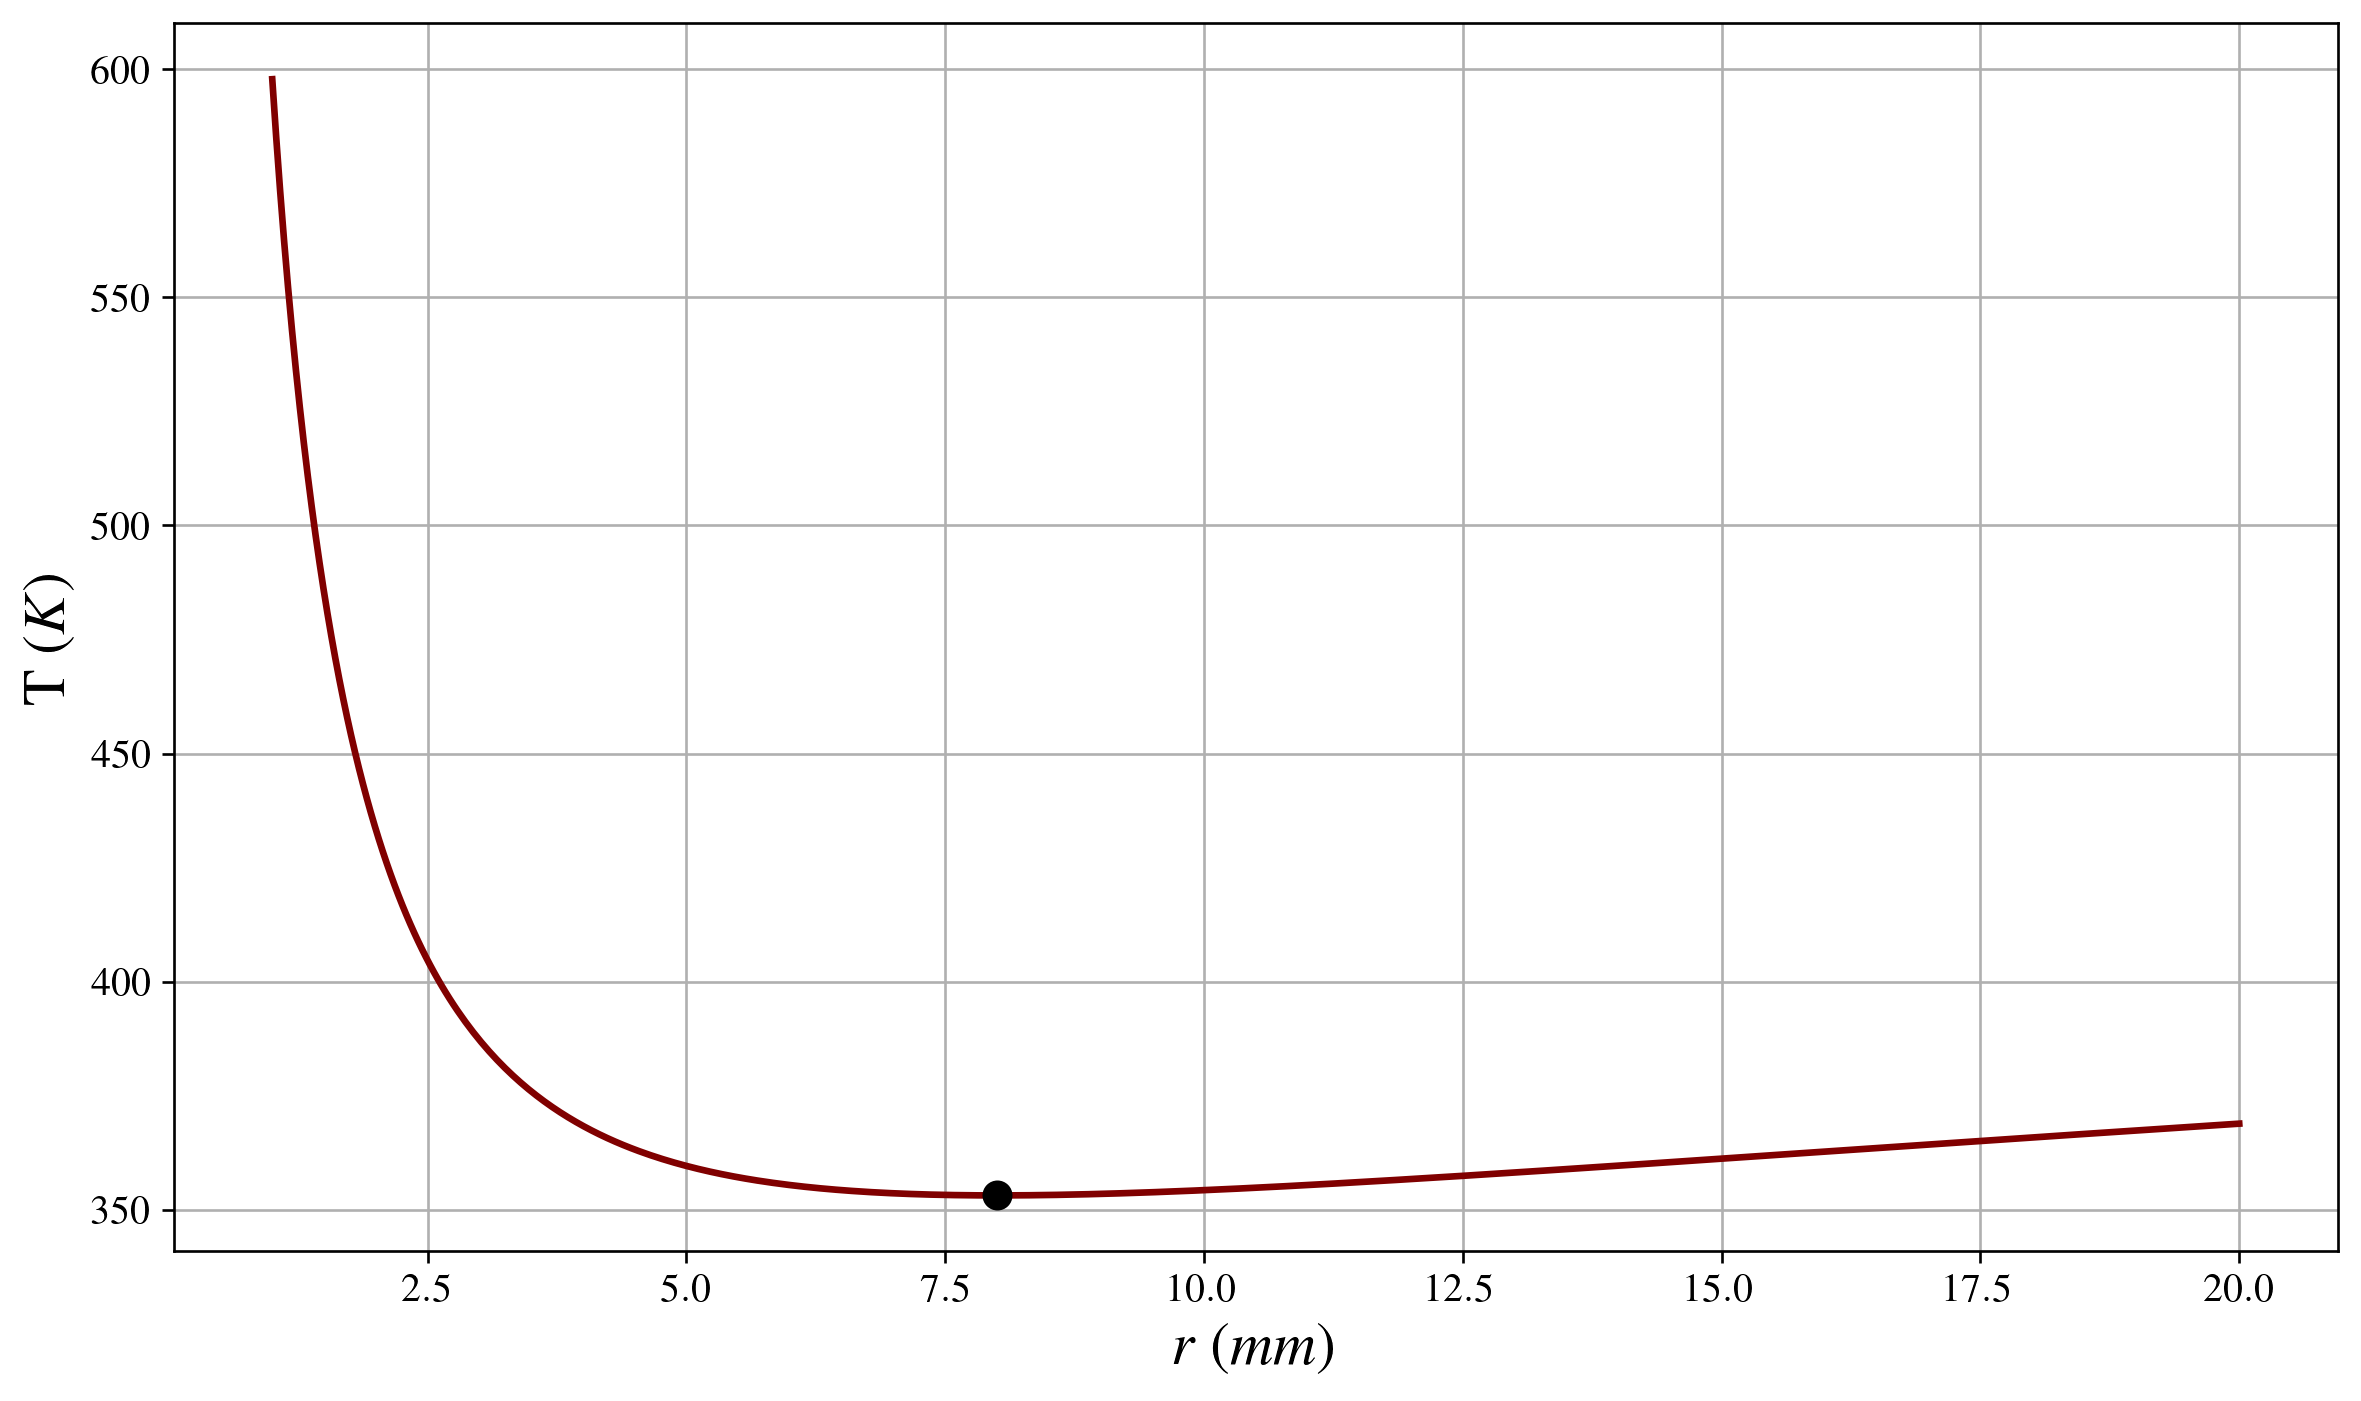

In [6]:
expr_lamb = sp.lambdify(r, expr.subs(sub_list), modules='numpy')
r_fine = np.linspace(0.001, 0.02, 500)  # m

fig, ax = plt.subplots()
ax.plot(r_fine*1000, expr_lamb(r_fine), zorder=2)
ax.scatter(r_*1000, expr_lamb(r_), zorder=3, color='black')
ax.set_xlabel('$r$ ($mm$)')
ax.set_ylabel('T ($K$)')
plt.show()

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Exam 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
The gamma function is an extension of the factorial function to the real numbers such that for all positive integers:

$$\Gamma(n)=(n-1)!$$

Defined by:

$$\Gamma(n)=\int^\infty_0 t^{n-1}e^{-t}dt$$

So the following are true:

$\Gamma(1)=0!=1$

$\Gamma(2)=1!=1$

$\Gamma(3)=2!=2$

$\Gamma(4)=3!=6$

$\Gamma(5)=4!=24$

Using a cubic spline and the above values to approximate the gamma function, estimate (a) $\Gamma(1.5)$ and (b) the minimum of the gamma function between 1 and 2. How do these predictions compare to the actual values of (a) $\frac{\sqrt{\pi}}{2}$ and (b) 0.885603.

## Solution

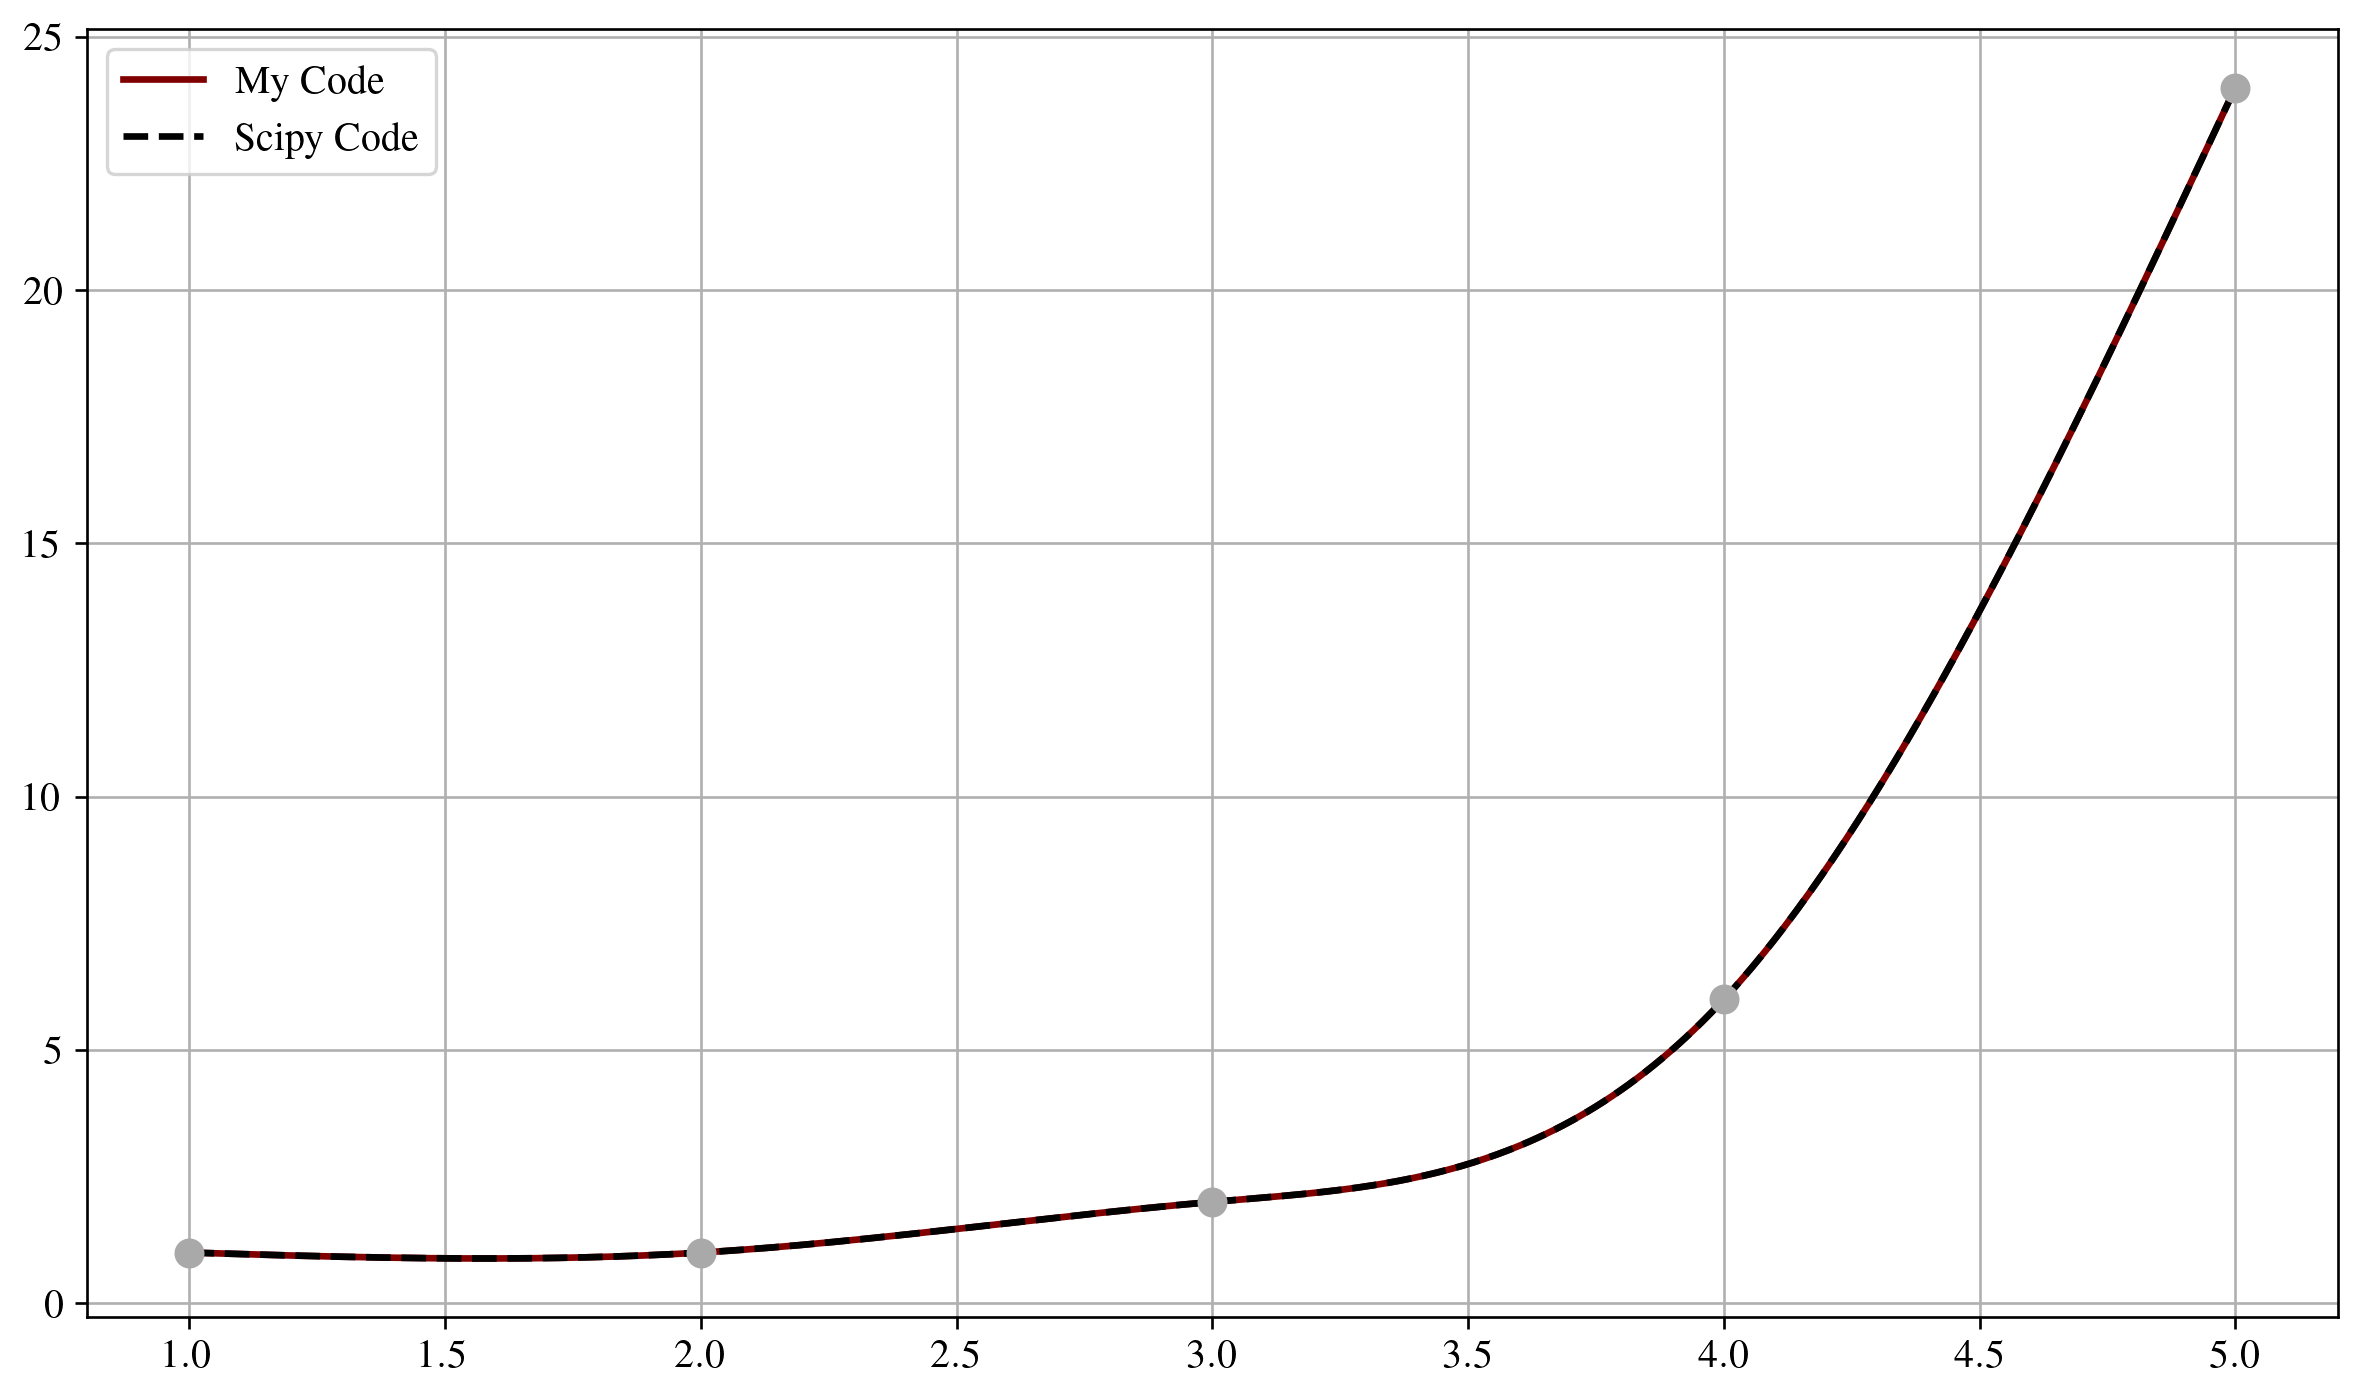

In [7]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 1, 2, 6, 24]

spline = CubicSpline(x_data, y_data)
spline_scipy = sc.CubicSpline(x_data, y_data, bc_type='natural')
x_fine = np.linspace(x_data[0], x_data[-1], 500)

fig, ax = plt.subplots()
ax.plot(x_fine, list(map(spline, x_fine)), zorder=2, label='My Code')
ax.plot(x_fine, spline_scipy(x_fine), zorder=2, label='Scipy Code', ls='--')
ax.scatter(x_data, y_data, color='darkgrey', zorder=3)
ax.legend()
plt.show()

The above plot shows that this is a natural cubic spline as the code inside the `eng_analysis` package is in agreement with the `scipy` package.

### Part A

In [8]:
# evaluate at 1.5
spline(1.5)

0.8861607142857143

### Part B
There is a way to extract the polynomials that construct the spline, but a better way is to define the numerical derivative as a function, then use the Newton Raphson method to find the zero.

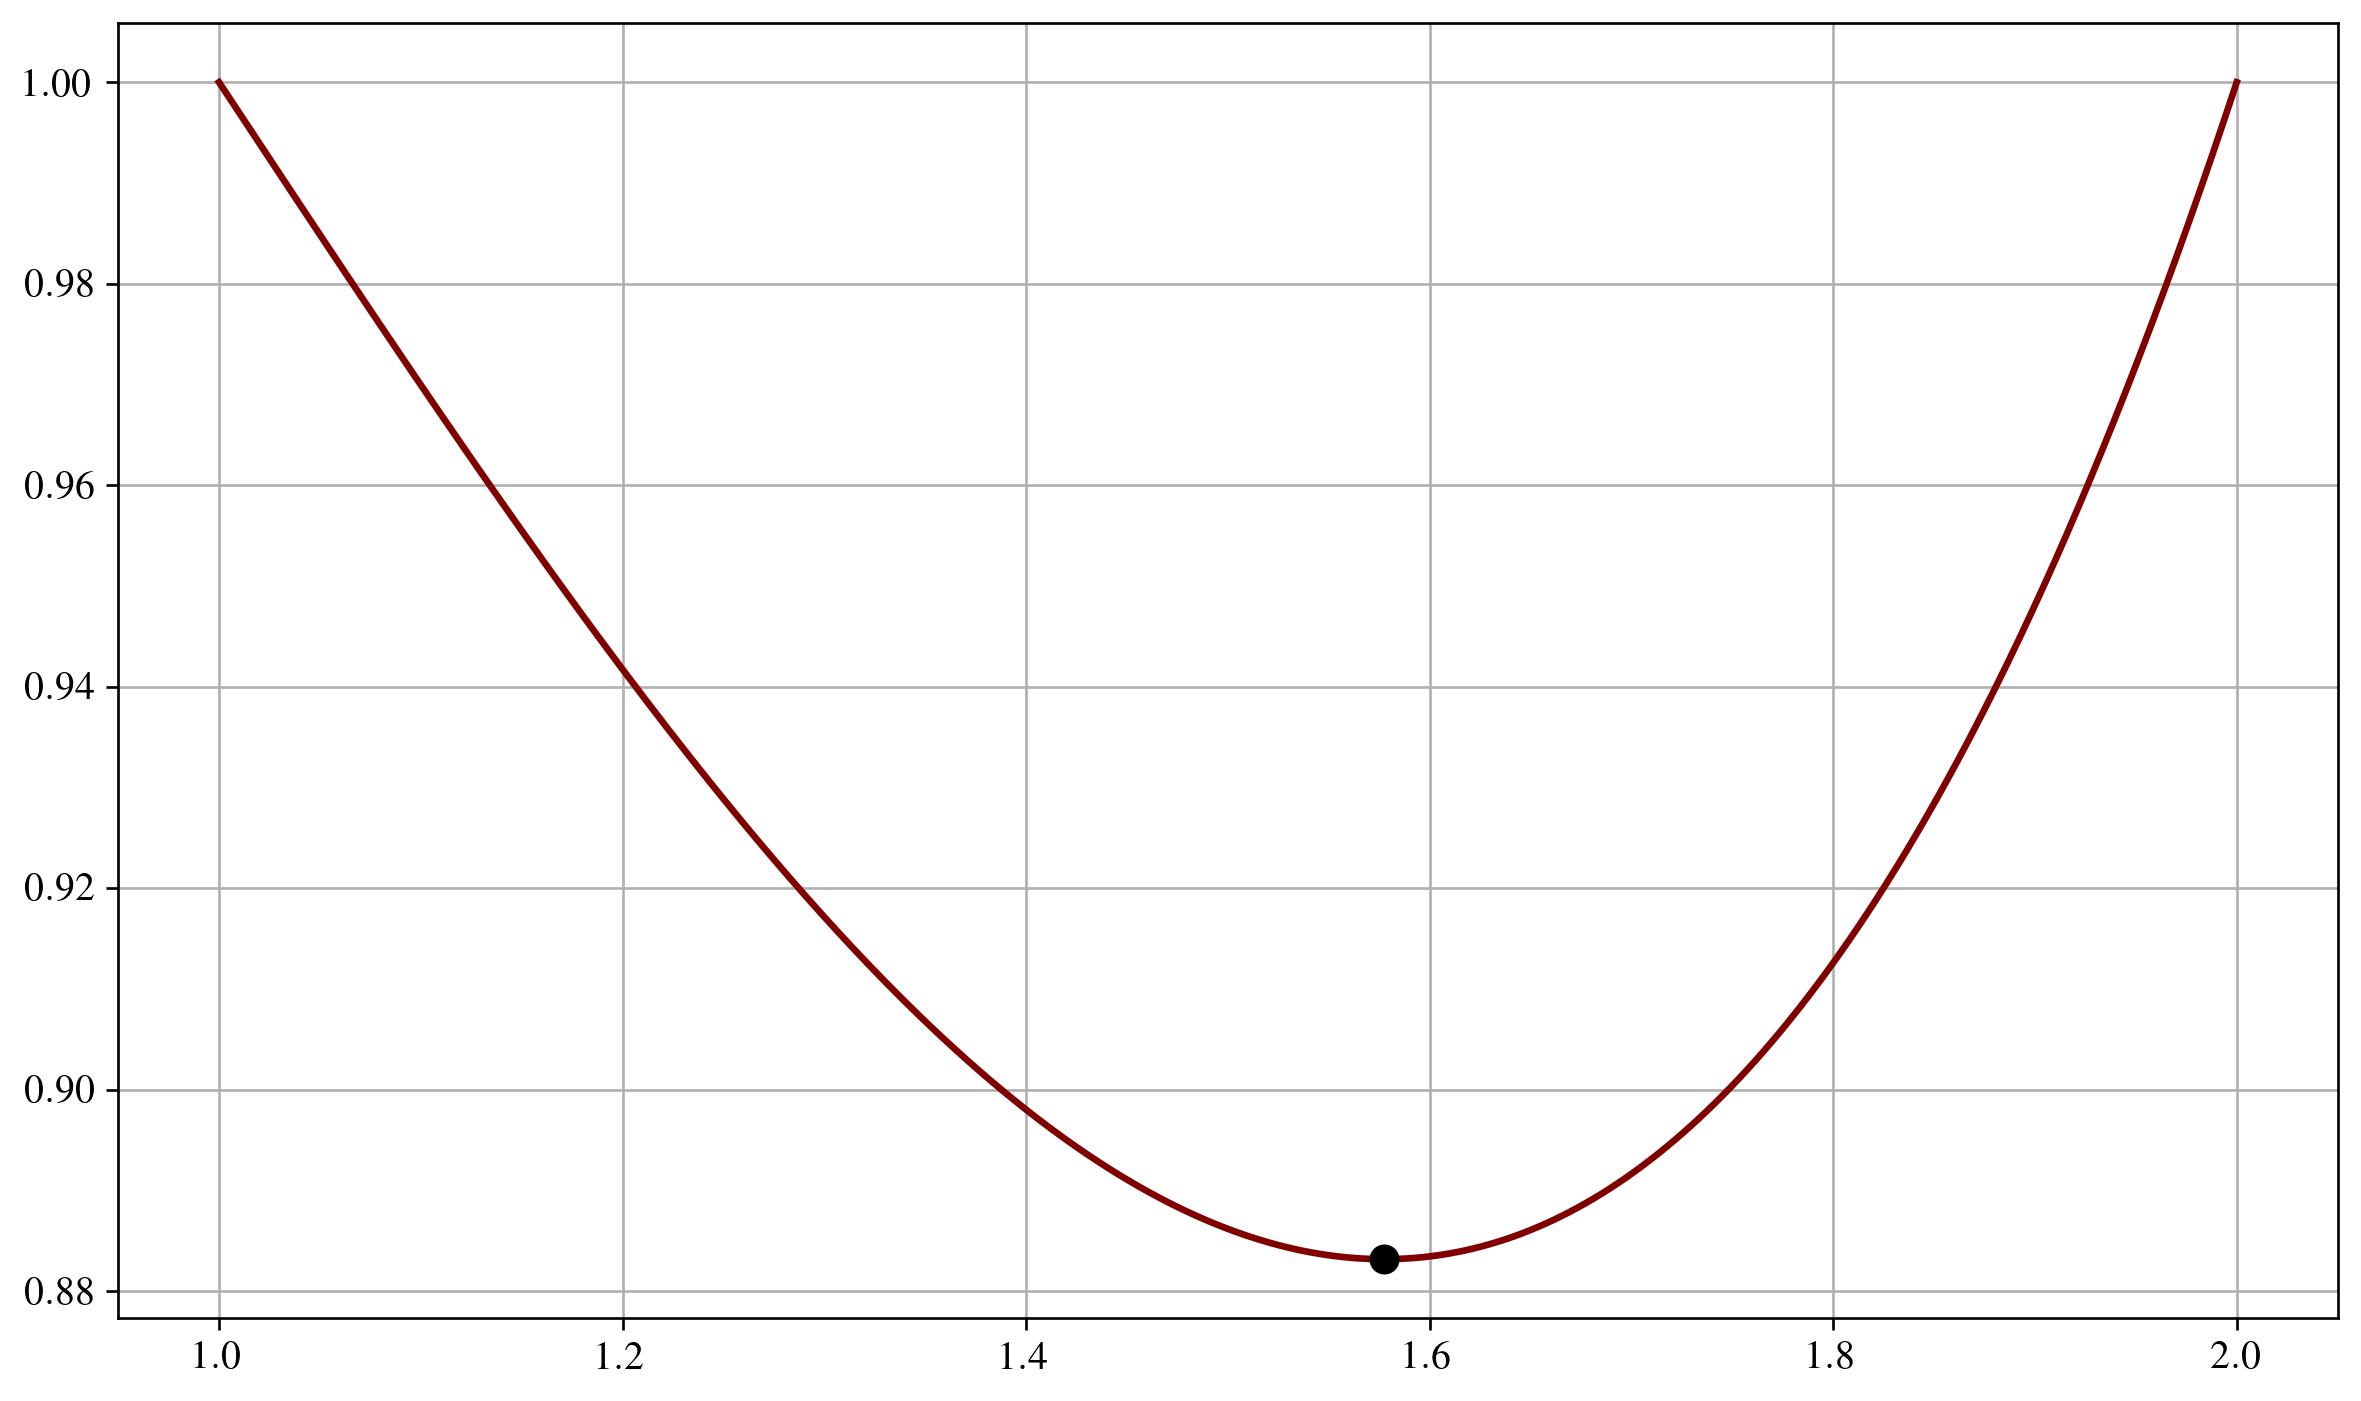

In [9]:
df = lambda x_, h_=1e-5: (spline(x_ + h_) - spline(x_ - h_))/(2*h_)

x_min = newton_raphson(df, (1.5, ))[0]
x_fine = np.linspace(x_data[0], x_data[1], 500)

fig, ax = plt.subplots()
ax.plot(x_fine, list(map(spline, x_fine)), zorder=2)
ax.scatter(x_min, spline(x_min), zorder=3, color='black')
plt.show()

In [10]:
# The minimum value is
spline(x_min)

0.8831553026640043

The comparison to the actual results are shown below.

In [11]:
# Part A
pA = np.sqrt(np.pi)/2
(spline(1.5) - pA)/pA*100  # %

-0.007471130152112367

In [12]:
# Part B
pB = 0.885603
(spline(x_min) - pB)/pB*100  # %

-0.27638765180286223

The predictions show a 0.007% smaller value for the spline model for part A and a 0.28% smaller value for the spline model for part B.

\pagebreak
\begin{center}
\begin{tabular}{ccc}
ME 8213 & Exam 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
The specific heat of Cu, $C_p$, depends on the temperature as follows:

$$
\begin{array}{|l|l|l|l|l|l|l|}
\hline \mathrm{T}(\mathrm{K}) & 5 & 10 & 16 & 20 & 30 & 40 \\
\hline \mathrm{c}_{\mathrm{p}}(\mathrm{J} / \mathrm{mol} \cdot \mathrm{K}) & 0.00943 & 0.0555 & 0.225 & 0.462 & 1.693 & 3.74 \\
\hline
\end{array}
$$

According to Solid State Theory at low temperatures, the specific heat capacity should vary as $c_p(T)=\gamma T+\beta T^3$ and is constant at higher temperatures. Fit $\gamma$ and $\beta$, then find the value of $c_p$ at 50K.

## Solution
The book has a certain way of obtaining the least squares solution, but I would rather do it my favorite way:

$$A^TA\hat{x}=A^Tb$$

The solution $\hat{x}$ is the least squares solution and can be obtained by using a linear solving method such as gaussian elimination. The benefit of doing it this way is the ability to set up/derive least squares solutions to many different systems rather than creating a set function for a specific system (such as polynomial or exponential). For this system, the matrix version is

$$
\begin{bmatrix}
T_0 & T_0^3 \\
T_1 & T_1^3 \\
\vdots & \vdots \\
T_n & T_n^3 \\
\end{bmatrix}
\begin{bmatrix}
\gamma \\
\beta
\end{bmatrix}=
\begin{bmatrix}
c_{p,0} \\
c_{p,1} \\
\vdots \\
c_{p,n} \\
\end{bmatrix}
$$

In [13]:
cp = [0.00943, 0.0555, 0.225, 0.462, 1.693, 3.74]
T = [5, 10, 16, 20, 30, 40]

A = np.float64([[T_, T_**3] for T_ in T])
A_ = np.matmul(np.transpose(A), A)
b_ = np.matmul(np.transpose(A), np.float64(cp))
gamma, beta = gauss_solve(A_, b_)
gamma, beta

(0.0014094456867996116, 5.801398182211235e-05)

To verify the least squares fit, the following plot can be constructed.

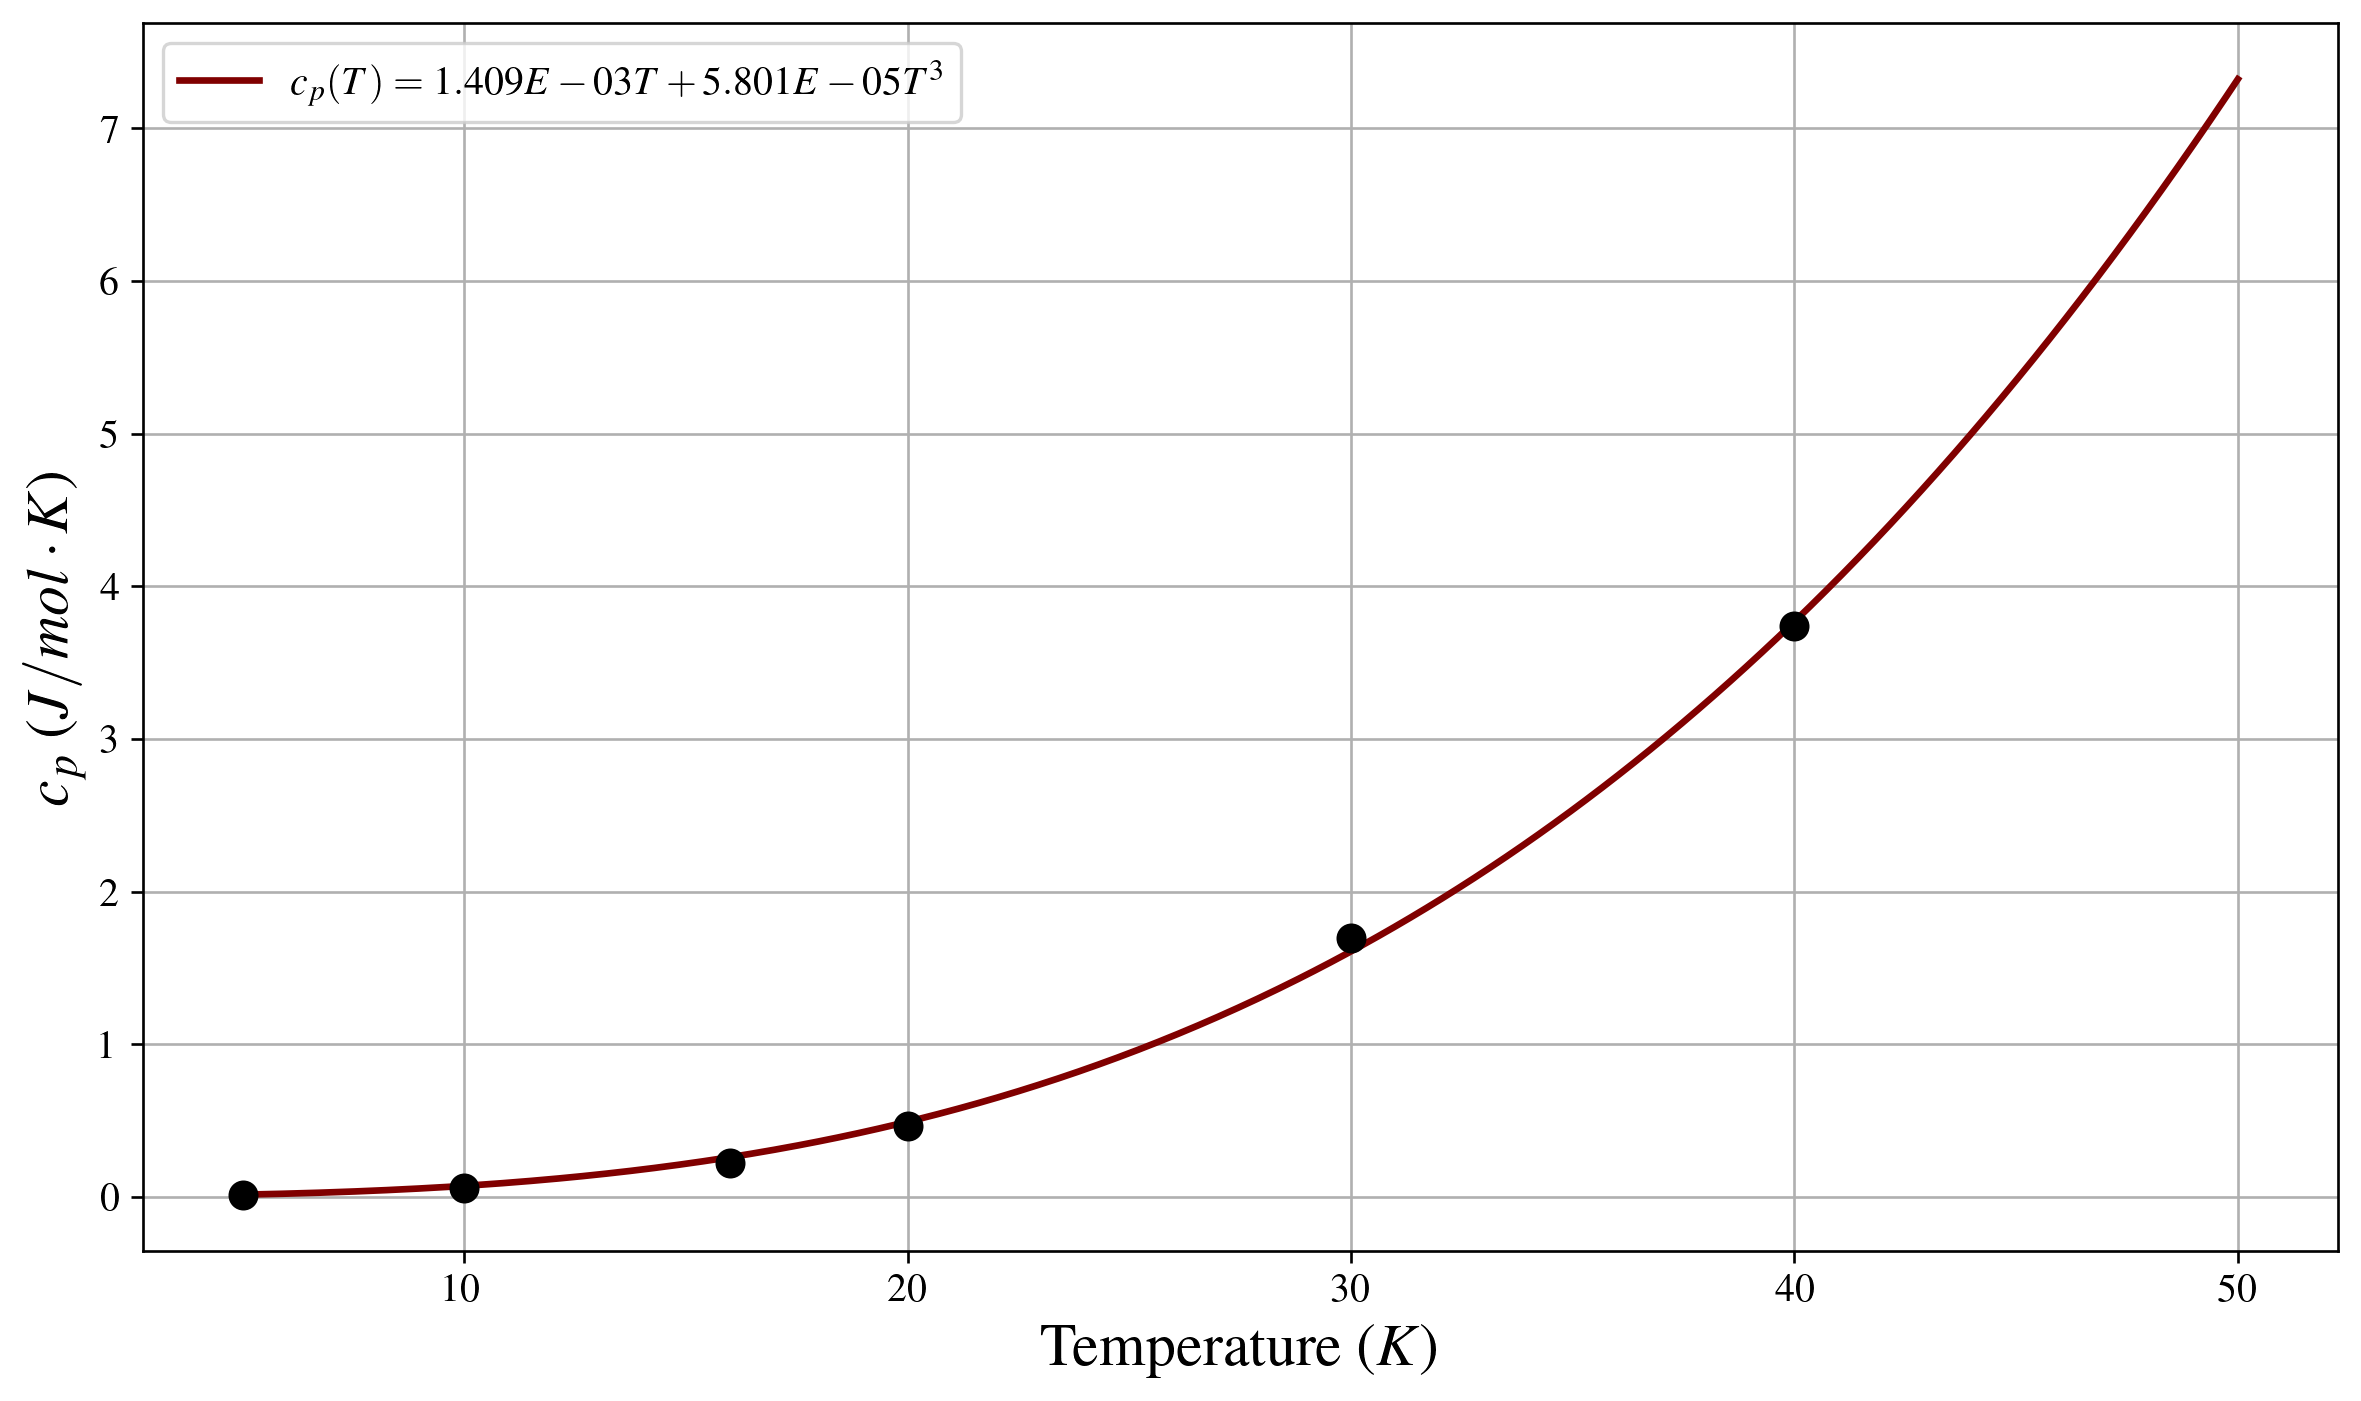

In [14]:
T_fine = np.linspace(T[0], 50, 500)
cp_lamb = lambda T_: gamma*T_ + beta*T_**3

fig, ax = plt.subplots()
ax.plot(T_fine, cp_lamb(T_fine), zorder=2, label=f'$c_p(T)={gamma:.3E}T+{beta:.3E}T^3$')
ax.scatter(T, cp, color='black', zorder=3)
ax.set_xlabel('Temperature ($K$)')
ax.set_ylabel('$c_p$ ($J/mol\cdot K$)')
ax.legend()
plt.show()

In [15]:
# At 50 K
cp_lamb(50)

7.322220012104024

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Exam 1 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 4

![figure 1](f1.PNG)

A 15-meter cable is suspended from A and D and carries concentrated loads at B and C. The vertical equilibrium equations of joints B and C are:

$$T(\tan(\theta_1)-\tan(\theta_2))=16$$

$$T(\tan(\theta_2)+\tan(\theta_3))=20$$

where $T$ is the horizontal component of the cable tension. In addition, there are two geometric constants due to the position of the supports:

$$-4\sin(\theta_1)-6\sin(\theta_2)+5\sin(\theta_3)=-3$$

$$4\cos(\theta_1)+6\cos(\theta_2)+5\sin(\theta_3)=12$$

Determine $\theta_1$, $\theta_2$, and $\theta_3$.

## Solution
Use the Newton Raphson method.

In [16]:
def f(x):
    return np.float64([
        x[3]*(np.tan(x[0]) - np.tan(x[1])) - 16,
        x[3]*(np.tan(x[1]) + np.tan(x[2])) - 20,
        -4*np.sin(x[0]) - 6*np.sin(x[1]) + 5*np.sin(x[2]) + 3,
        4*np.cos(x[0]) + 6*np.cos(x[1]) + 5*np.cos(x[2]) - 12
    ])

sol = newton_raphson(f, [0.9, 0.4, 0.58, 18])
sol

array([ 0.93580275,  0.43344988,  0.58004954, 17.88840896])

In [17]:
# Solution in degrees
np.rad2deg(sol[:-1])  # degrees

array([53.61754813, 24.83484884, 33.23439049])